In [2]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import plotly as pt
import json
from state_helper import us_state_abbrev
plt.style.use('ggplot')
import seaborn as sns

In [5]:
pwd

'/Users/Brancusi/Desktop/SBUX_analysis'

In [6]:
cd ./yelp

/Users/Brancusi/Desktop/SBUX_analysis/yelp


In [7]:
nyc = pd.read_csv('coffeehouse.csv')

In [8]:
nyc.head()

,address,business_hours,business_name,zipcode
0,"359 West 45th St, New York, NY 10036","{'Mon': '8:00 am - 2:00 pm', 'Tue': '8:00 am -...",Bird & Branch,10036
1,"667 10th Ave, New York, NY 10036","{'Mon': '7:00 am - 8:00 pm', 'Tue': '7:00 am -...",Kahve,10036
2,"235 W 48th St, New York, NY 10036","{'Mon': '9:00 am - 4:00 pm', 'Tue': '9:00 am -...",Masseria Caffé & Bakery,10036
3,"11 Times Square, New York, NY 10036","{'Mon': '7:00 am - 3:00 pm', 'Tue': '7:00 am -...",Bluestone Lane,10036
4,"54 W 40th St, New York, NY 10018","{'Mon': '7:00 am - 6:00 pm', 'Tue': '7:00 am -...",Blue Bottle Coffee,10018


In [15]:
nyc['zipcode'] = nyc['zipcode'].astype('str')

In [78]:
nyc['zipcode'] = [x if len(x) == 5 and x.startswith('1') else 0 for x in nyc['zipcode']]

In [79]:
nyc['zipcode'] = nyc.loc[nyc['zipcode'] != 0]

In [41]:
nyc.groupby('zipcode')

In [47]:
cd ..

/Users/Brancusi/Desktop/SBUX_analysis


In [52]:
sbux = pd.read_csv('directory.csv')

In [67]:
sbuxny = sbux.loc[sbux['State/Province'] == 'NY']

In [61]:
sbuxny['Postcode'] = sbuxny['Postcode'].astype('str')

/Users/Brancusi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
postal = [x[:5] for x in sbux['Postcode']]

In [66]:
sbux['Postcode'] = postal

In [68]:
sbuxny.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
20858,Starbucks,7379-1056,Wolf Road,Company Owned,"18 Wolf Rd, Crossgates Mall",Albany,NY,US,12205,(518) 435-9280,GMT-05:00 America/New_York,-73.82,42.71
20859,Starbucks,11064-103915,Crossgates Mall,Company Owned,"1 Crossgates Mall Road, B231",Albany,NY,US,12203,518-218-1520,GMT-05:00 America/New_York,-73.85,42.69
20860,Starbucks,15207-156777,Target Colonie T-1268,Licensed,1440 Central Ave,Albany,NY,US,12205,518-489-1112,GMT-05:00 America/New_York,-73.82,42.71
20861,Starbucks,7922-92120,North Pearl Street,Company Owned,10 North Pearl St,Albany,NY,US,12207,518-463-6990,GMT-05:00 America/New_York,-73.75,42.65
20862,Starbucks,75393-105057,College St. Rose,Licensed,"420 Western Ave, Hilton Garden Inn at Albany M...",Albany,NY,US,12203,518-485-3946,GMT-05:00 America/New_York,-73.79,42.66


In [113]:
sbuxny.groupby('Postcode').count().sort_values('Brand', ascending = False).head(15)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Phone Number,Timezone,Longitude,Latitude
Postcode,,,,,,,,,,,,
10019,20,20,20,20,20,20,20,20,19,20,20,20
10017,18,18,18,18,18,18,18,18,18,18,18,18
10001,15,15,15,15,15,15,15,15,15,15,15,15
10022,14,14,14,14,14,14,14,14,14,14,14,14
10036,13,13,13,13,13,13,13,13,13,13,13,13
11201,11,11,11,11,11,11,11,11,11,11,11,11
10003,10,10,10,10,10,10,10,10,10,10,10,10
10010,9,9,9,9,9,9,9,9,9,9,9,9
10023,9,9,9,9,9,9,9,9,9,9,9,9


In [71]:
nyc.groupby('zipcode').count()

,address,business_hours,business_name
zipcode,,,
"1 Park Ave, New York, NY 10016",1,1,1
"10 E 53rd St, New York, NY 10022",1,1,1
"100 Central Park S, New York, NY 10019",1,1,1
"1045 6th Ave, New York, NY 10018",1,1,1
"107 W 18th St, New York, NY 10011",1,1,1
...,...,...,...
"956 3rd Ave, New York, NY 10022",1,1,1
"96 7th Ave, New York, NY 10011",1,1,1
"977 8th Ave, New York, NY 10019",1,1,1


In [83]:
nyc['zipcode'] = nyc['zipcode'].astype('str')

In [84]:
nyc['zipcode'] = [x[-5:] for x in nyc['zipcode']]

In [85]:
nyc.head()

,address,business_hours,business_name,zipcode
0,"359 West 45th St, New York, NY 10036","{'Mon': '8:00 am - 2:00 pm', 'Tue': '8:00 am -...",Bird & Branch,10036
1,"667 10th Ave, New York, NY 10036","{'Mon': '7:00 am - 8:00 pm', 'Tue': '7:00 am -...",Kahve,10036
2,"235 W 48th St, New York, NY 10036","{'Mon': '9:00 am - 4:00 pm', 'Tue': '9:00 am -...",Masseria Caffé & Bakery,10036
3,"11 Times Square, New York, NY 10036","{'Mon': '7:00 am - 3:00 pm', 'Tue': '7:00 am -...",Bluestone Lane,10036
4,"54 W 40th St, New York, NY 10018","{'Mon': '7:00 am - 6:00 pm', 'Tue': '7:00 am -...",Blue Bottle Coffee,10018


In [104]:
nyc = nyc.loc[nyc['zipcode'] != 'nan']

In [105]:
nyc = nyc.dropna(axis=0)

In [110]:
nyc.groupby('zipcode').count().sort_values('address', ascending = False).head(10)

,address,business_hours,business_name
zipcode,,,
10018,33,33,33
10036,30,30,30
10001,27,27,27
10019,22,22,22
10016,16,16,16
10017,16,16,16
10022,15,15,15
10011,14,14,14
10010,9,9,9


No handles with labels found to put in legend.


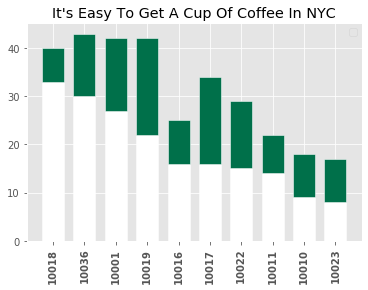

In [128]:
bar1 = [33, 30, 27, 22, 16, 16, 15, 14, 9, 8]
bar2 = [7,13,15, 20, 9,18, 14,8,9, 9]
bars = np.add(bar1, bar2).tolist()
names = ['10018','10036','10001','10019','10016', '10017', '10022', '10011', '10010', '10023']
barWidth = 2

r = [0,1,2,3,4, 5, 6, 7, 8, 9]


plt.bar(r, bar1, color='white', edgecolor='white', width=.7)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bar2, bottom=bar1, color='#00704A', edgecolor='white', align='center', width=0.7)
plt.title("It's Easy To Get A Cup Of Coffee In NYC")
plt.xticks(r, names, fontweight='bold', rotation='vertical')

plt.legend()
# nyc.groupby('zipcode').count().address.sort_values(ascending=False).head(10).plot.bar(color='#00704A')
# sbuxny.groupby('Postcode').count().Brand.sort_values(ascending=False).head(10).plot.bar(color='white')